# **Auto Price Prediction**


Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model by applying some data science techniques for the price of cars with the available independent variables. That should help the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [63]:
data=pd.read_csv('/content/auto_imports_.csv')

In [64]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##Domain Analysis

The main goal of this dataset is to **predict the selling price of a car** based on its technical specifications and attributes.

- Target / Dependent Feature — `price`


- Input / Independent Features —

`symboling`, `normalized-losses`, `make`, `fuel-type`, `aspiration`, `num-of-doors`, `body-style`, `drive-wheels`, `engine-location`, `wheel-base`, `length`, `width`, `height`, `curb-weight`, `engine-type`, `num-of-cylinders`, `engine-size`, `fuel-system`, `bore`, `stroke`, `compression-ratio`, `horsepower`, `peak-rpm`, `city-mpg`, `highway-mpg`



# Basic Checks

In [65]:
data.shape

(201, 26)

In [66]:
data.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [67]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [68]:
data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [70]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [71]:
data['price'].describe()

,price
count,201.000000
mean,13207.129353
std,7947.066342
min,5118.000000
25%,7775.000000
50%,10295.000000
75%,16500.000000
max,45400.000000


#### Insights

* The minimum Car price is 5118/-
* The maximum Car price is 	45400/-

In [72]:
data.nunique()

,0
symboling,6
normalized-losses,52
make,22
fuel-type,2
aspiration,2
num-of-doors,3
body-style,5
drive-wheels,3
engine-location,2
wheel-base,52


# Data Cleaning

In [73]:
data.isnull().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [74]:
data.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [75]:
# Replace '?' with NaN
data.replace("?", np.nan, inplace=True)

In [76]:
# Columns to convert
cols_to_convert = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm"]

# Convert each column to float64
for col in cols_to_convert:
    data[col] = data[col].astype(float)

In [77]:
data.isnull().sum()

,0
symboling,0
normalized-losses,37
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [78]:
data.dropna(inplace=True)                        # Removing Null Values

In [79]:

data.isnull().sum()                           # Rechecking is Null Values droped or not

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [80]:
data.duplicated().sum()

np.int64(0)

In [81]:
# Checking unique values of important categorical columns
categorical_cols = [
    "make",
    "fuel-type",
    "aspiration",
    "num-of-doors",
    "body-style",
    "drive-wheels",
    "engine-location",
    "engine-type",
    "num-of-cylinders",
    "fuel-system"
]

for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(data[col].unique())



Unique values in 'make':
['audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'jaguar' 'mazda' 'mercedes-benz'
 'mitsubishi' 'nissan' 'peugot' 'plymouth' 'porsche' 'saab' 'subaru'
 'toyota' 'volkswagen' 'volvo']

Unique values in 'fuel-type':
['gas' 'diesel']

Unique values in 'aspiration':
['std' 'turbo']

Unique values in 'num-of-doors':
['four' 'two']

Unique values in 'body-style':
['sedan' 'hatchback' 'wagon' 'hardtop' 'convertible']

Unique values in 'drive-wheels':
['fwd' '4wd' 'rwd']

Unique values in 'engine-location':
['front']

Unique values in 'engine-type':
['ohc' 'l' 'dohc' 'ohcv' 'ohcf']

Unique values in 'num-of-cylinders':
['four' 'five' 'six' 'three' 'eight']

Unique values in 'fuel-system':
['mpfi' '2bbl' 'mfi' '1bbl' 'idi' 'spdi']


In [82]:
# 'engine-location' has only one value ('front') for all rows.
# Since it does not change, it gives no information to the model.
# So we can safely drop it before EDA.
data.drop(columns=["engine-location"], inplace=True)


In [83]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450
6,1,158.0,audi,gas,std,four,sedan,fwd,105.8,192.7,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710
8,1,158.0,audi,gas,turbo,four,sedan,fwd,105.8,192.7,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875
9,2,192.0,bmw,gas,std,two,sedan,rwd,101.2,176.8,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430


###Data Cleaning Conclusion

- Replaced all `"?"` values with `NaN` and converted affected columns (`normalized-losses`, `bore`, `stroke`, `horsepower`, `peak-rpm`) to `float64`.
- Dropped `engine-location` because it had only one unique value.
- Checked categorical columns for unique values to ensure consistency.
- Verified no duplicate rows and inspected numeric columns for outliers.

The dataset is now clean, consistent, and ready for EDA.


## Exploratory Data Analysis

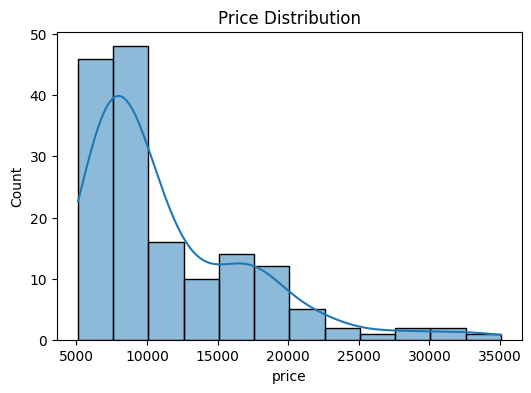

In [84]:
plt.figure(figsize=(6,4))
sns.histplot(data['price'], kde=True)
plt.title("Price Distribution")
plt.show()

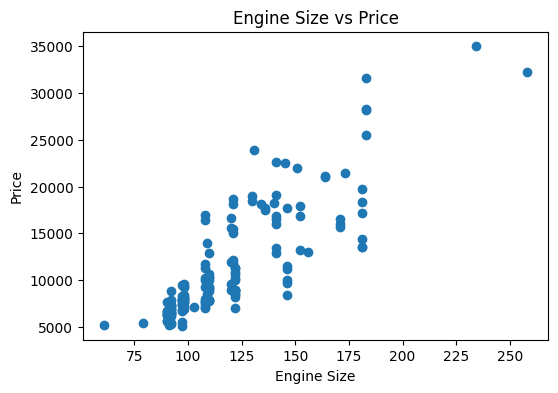

In [85]:
plt.figure(figsize=(6,4))                             #1. Engine Size vs Price
plt.scatter(data['engine-size'], data['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Engine Size vs Price')
plt.show()

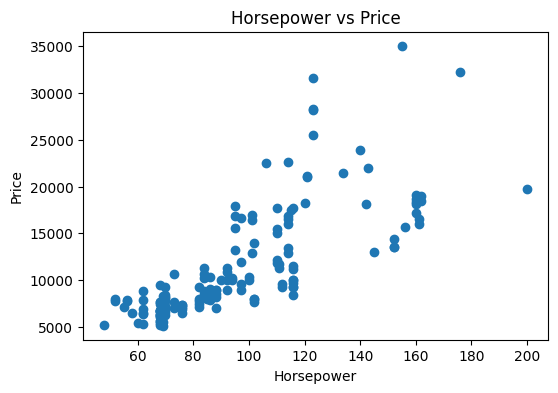

In [86]:
plt.figure(figsize=(6,4))                           #2. Horsepower vs Price
plt.scatter(data['horsepower'], data['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Horsepower vs Price')
plt.show()


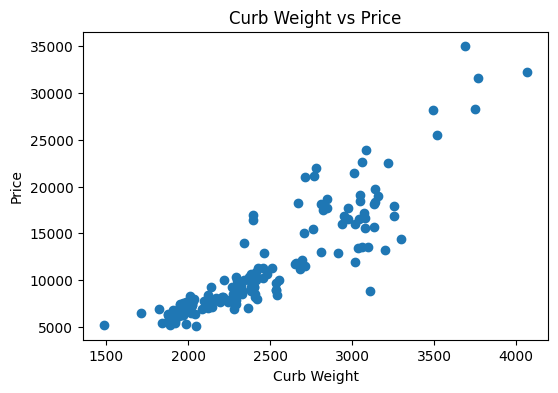

In [87]:
plt.figure(figsize=(6,4))                             #3. Curb Weight vs Price
plt.scatter(data['curb-weight'], data['price'])
plt.xlabel('Curb Weight')
plt.ylabel('Price')
plt.title('Curb Weight vs Price')
plt.show()


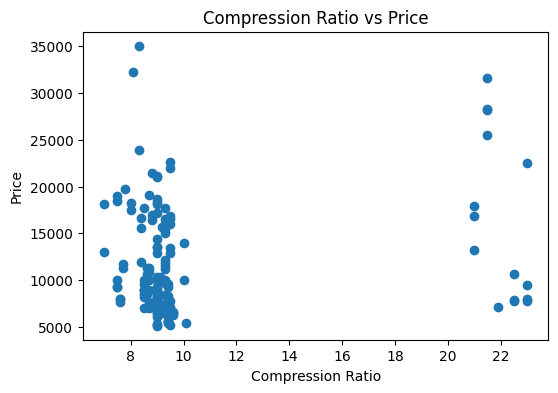

In [88]:
plt.figure(figsize=(6,4))                                 #4. Compression Ratio vs Price
plt.scatter(data['compression-ratio'], data['price'])
plt.xlabel('Compression Ratio')
plt.ylabel('Price')
plt.title('Compression Ratio vs Price')
plt.show()


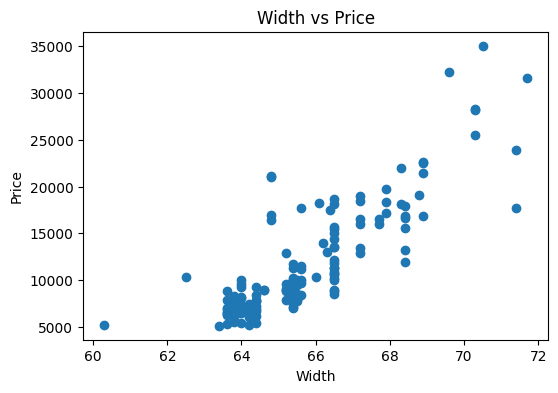

In [89]:
plt.figure(figsize=(6,4))                         #5. Width vs Price
plt.scatter(data['width'], data['price'])
plt.xlabel('Width')
plt.ylabel('Price')
plt.title('Width vs Price')
plt.show()


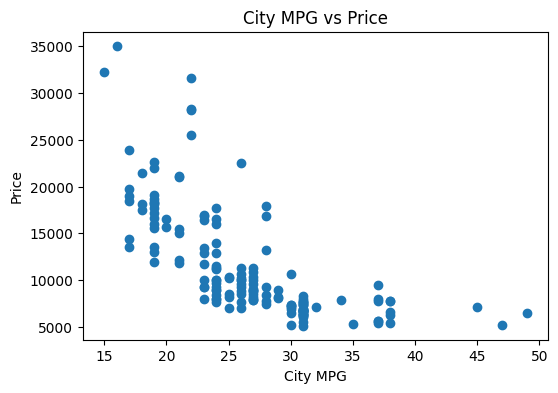

In [90]:

plt.figure(figsize=(6,4))                         #6. City MPG vs Price
plt.scatter(data['city-mpg'], data['price'])
plt.xlabel('City MPG')
plt.ylabel('Price')
plt.title('City MPG vs Price')
plt.show()


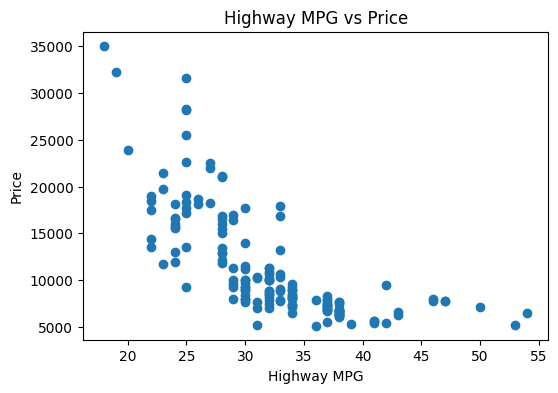

In [91]:
plt.figure(figsize=(6,4))                           #7. Highway MPG vs Price
plt.scatter(data['highway-mpg'], data['price'])
plt.xlabel('Highway MPG')
plt.ylabel('Price')
plt.title('Highway MPG vs Price')
plt.show()


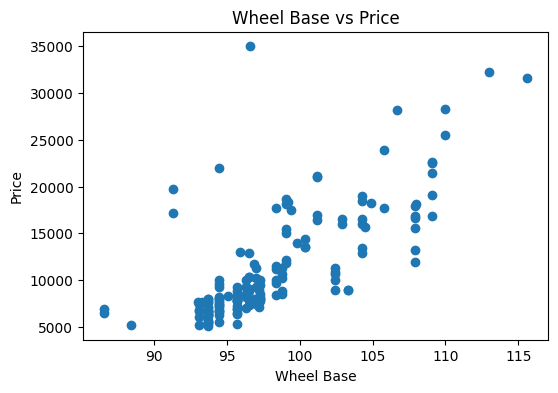

In [92]:
plt.figure(figsize=(6,4))                           #8. Wheel Base vs Price
plt.scatter(data['wheel-base'], data['price'])
plt.xlabel('Wheel Base')
plt.ylabel('Price')
plt.title('Wheel Base vs Price')
plt.show()

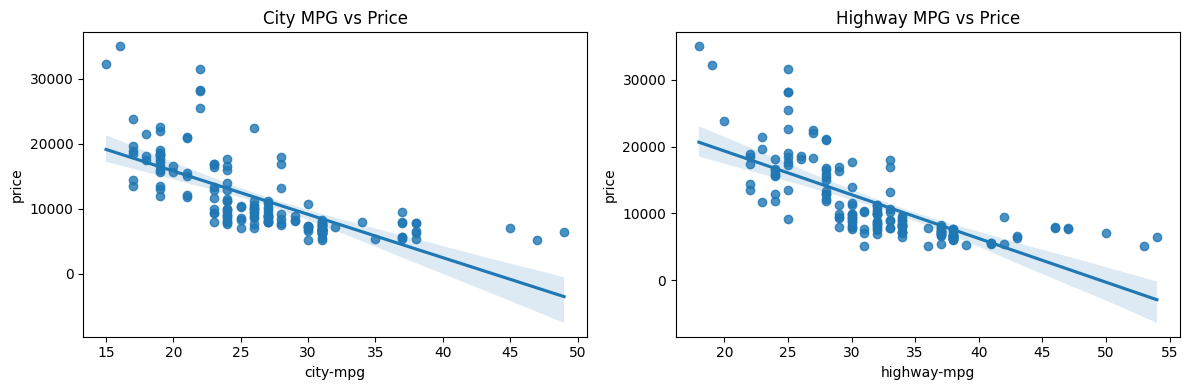

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# City MPG vs Price
sns.regplot(x='city-mpg', y='price', data=data, ax=ax[0])
ax[0].set_title("City MPG vs Price")

# Highway MPG vs Price
sns.regplot(x='highway-mpg', y='price', data=data, ax=ax[1])
ax[1].set_title("Highway MPG vs Price")

plt.tight_layout()
plt.show()

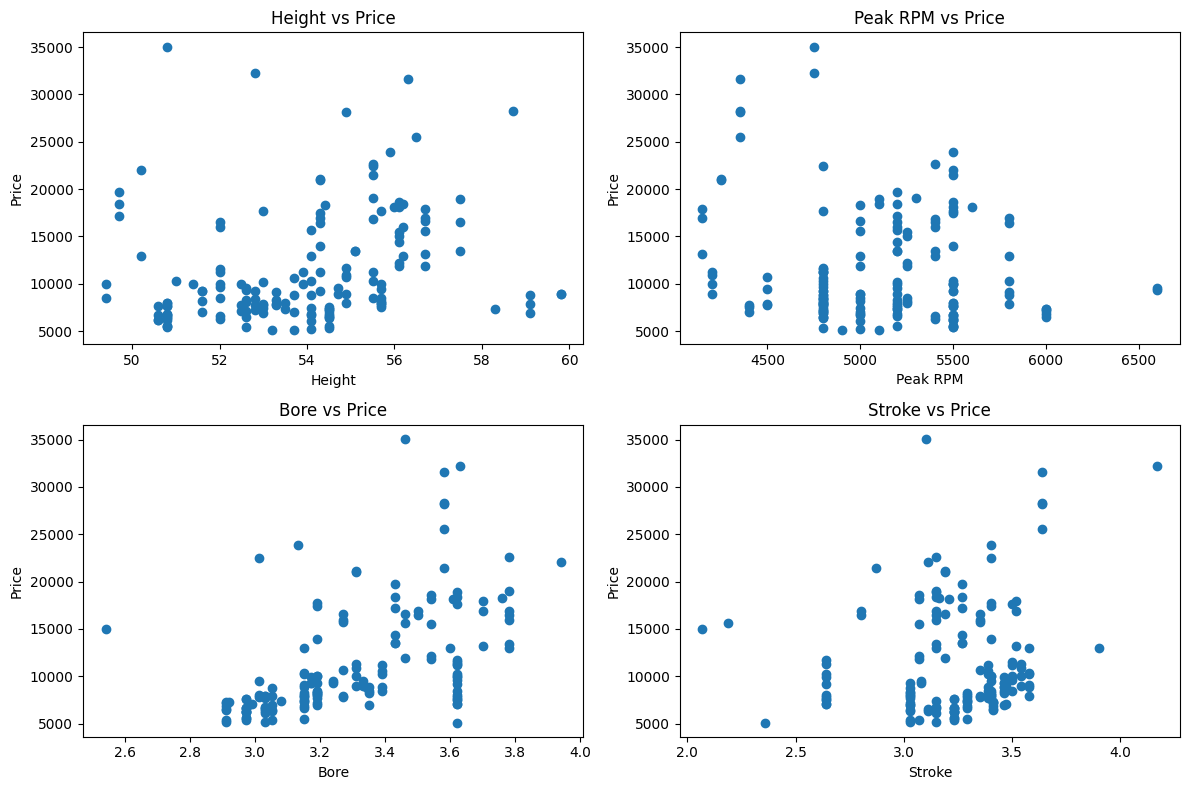

In [94]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Height vs Price
ax[0, 0].scatter(data['height'], data['price'])
ax[0, 0].set_title("Height vs Price")
ax[0, 0].set_xlabel("Height")
ax[0, 0].set_ylabel("Price")

# Peak RPM vs Price
ax[0, 1].scatter(data['peak-rpm'], data['price'])
ax[0, 1].set_title("Peak RPM vs Price")
ax[0, 1].set_xlabel("Peak RPM")
ax[0, 1].set_ylabel("Price")

# Bore vs Price
ax[1, 0].scatter(data['bore'], data['price'])
ax[1, 0].set_title("Bore vs Price")
ax[1, 0].set_xlabel("Bore")
ax[1, 0].set_ylabel("Price")

# Stroke vs Price
ax[1, 1].scatter(data['stroke'], data['price'])
ax[1, 1].set_title("Stroke vs Price")
ax[1, 1].set_xlabel("Stroke")
ax[1, 1].set_ylabel("Price")

plt.tight_layout()
plt.show()


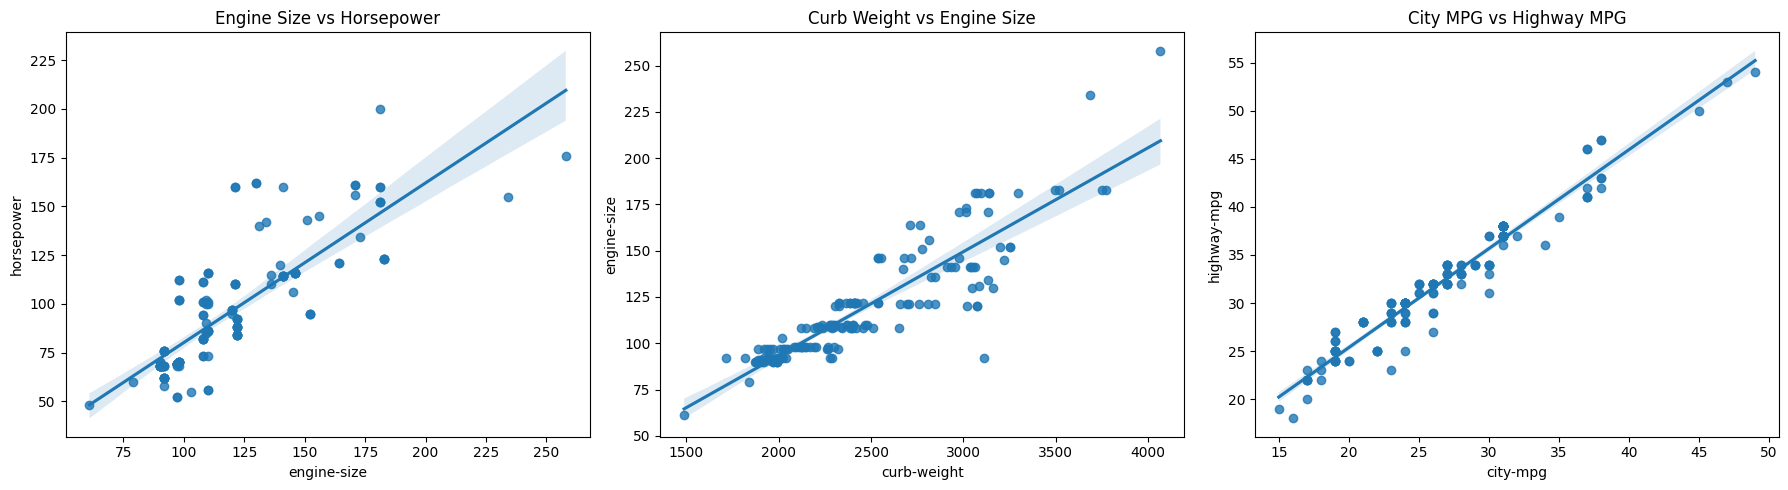

In [95]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# 1. Engine Size vs Horsepower
sns.regplot(x='engine-size', y='horsepower', data=data, ax=ax[0])
ax[0].set_title("Engine Size vs Horsepower")

# 2. Curb Weight vs Engine Size
sns.regplot(x='curb-weight', y='engine-size', data=data, ax=ax[1])
ax[1].set_title("Curb Weight vs Engine Size")

# 3. City MPG vs Highway MPG
sns.regplot(x='city-mpg', y='highway-mpg', data=data, ax=ax[2])
ax[2].set_title("City MPG vs Highway MPG")

plt.tight_layout()
plt.show()

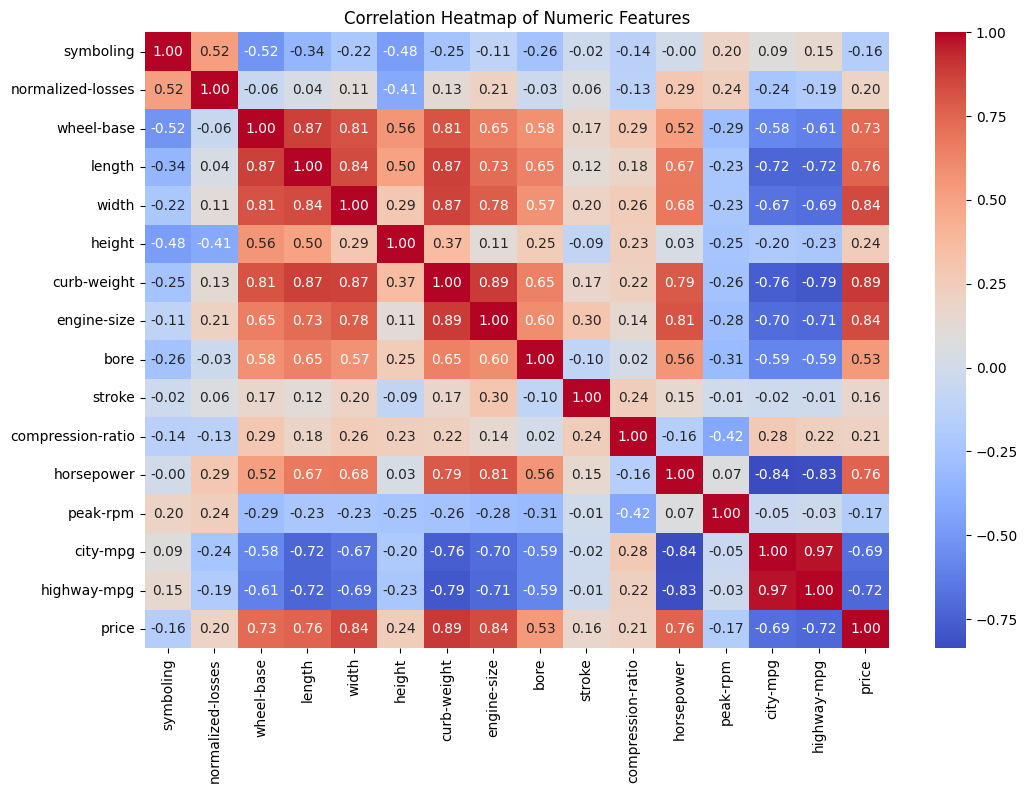

In [96]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
feature_corr = data[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(feature_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


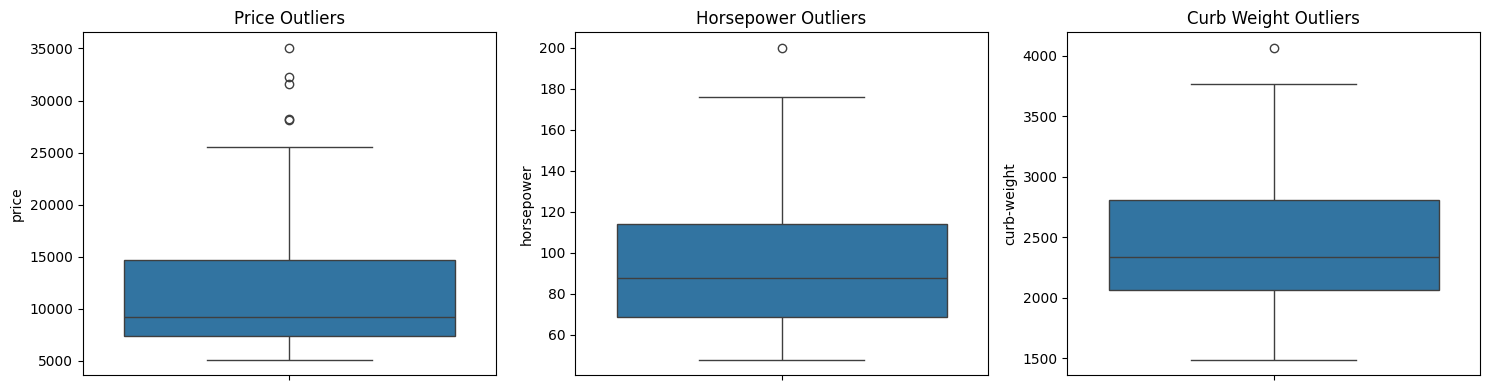

In [97]:
plt.figure(figsize=(15, 4))

# price
plt.subplot(1, 3, 1)
sns.boxplot(y=data['price'])
plt.title('Price Outliers')

# horsepower
plt.subplot(1, 3, 2)
sns.boxplot(y=data['horsepower'])
plt.title('Horsepower Outliers')

# curb-weight
plt.subplot(1, 3, 3)
sns.boxplot(y=data['curb-weight'])
plt.title('Curb Weight Outliers')

plt.tight_layout()
plt.show()



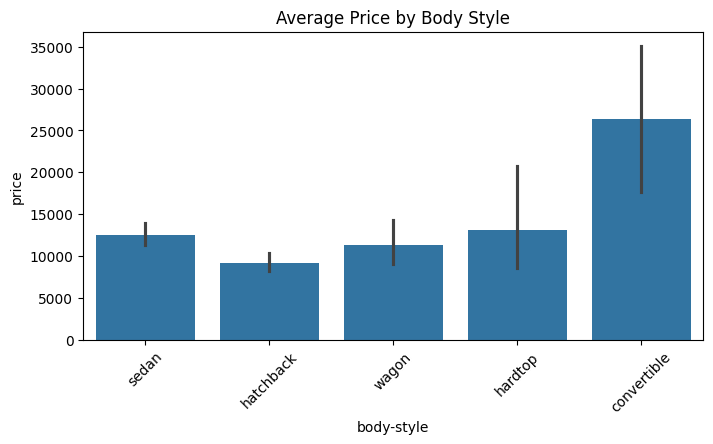

In [98]:
plt.figure(figsize=(8,4))
sns.barplot(x='body-style', y='price', data=data, estimator=np.mean)
plt.title("Average Price by Body Style")
plt.xticks(rotation=45)
plt.show()



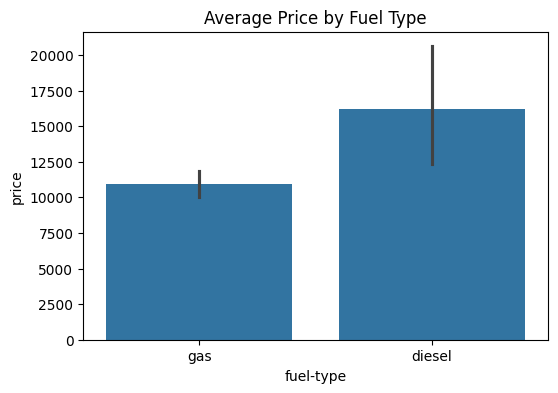

In [99]:
plt.figure(figsize=(6,4))
sns.barplot(x='fuel-type', y='price', data=data, estimator=np.mean)
plt.title("Average Price by Fuel Type")
plt.show()


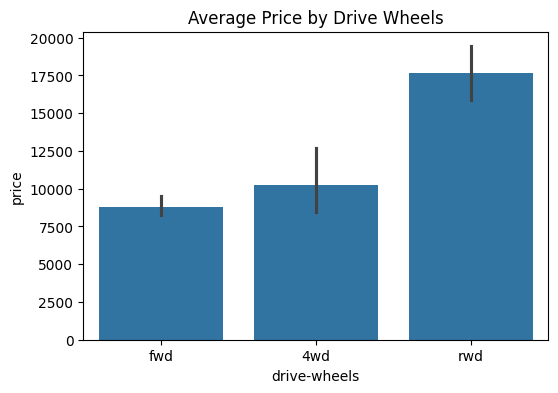

In [100]:
plt.figure(figsize=(6,4))
sns.barplot(x='drive-wheels', y='price', data=data, estimator=np.mean)
plt.title("Average Price by Drive Wheels")
plt.show()


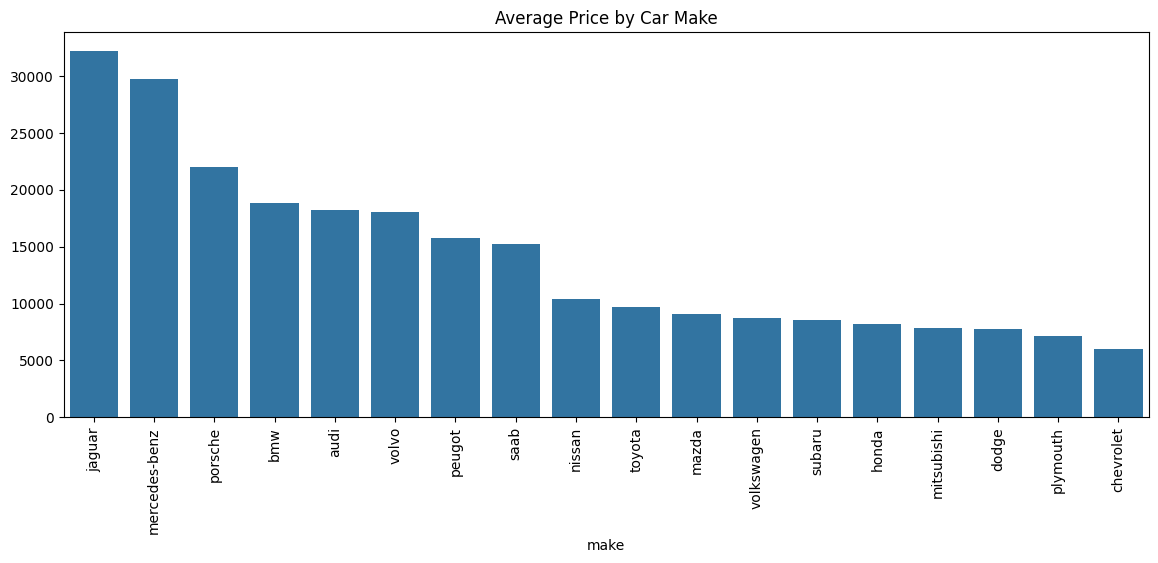

In [101]:
plt.figure(figsize=(14,5))
avg_price = data.groupby('make')['price'].mean().sort_values(ascending=False)

sns.barplot(x=avg_price.index, y=avg_price.values)
plt.title("Average Price by Car Make")
plt.xticks(rotation=90)
plt.show()


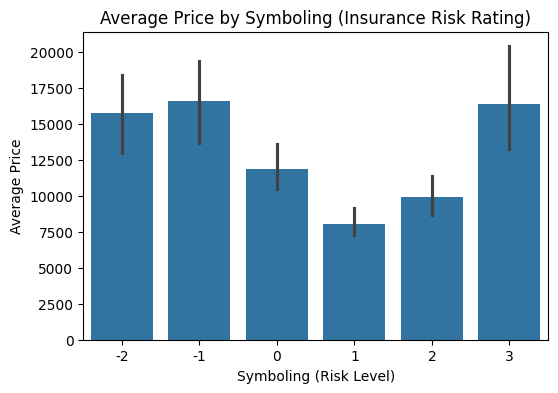

In [102]:
plt.figure(figsize=(6,4))
sns.barplot(x='symboling', y='price', data=data, estimator=np.mean)
plt.title("Average Price by Symboling (Insurance Risk Rating)")
plt.xlabel("Symboling (Risk Level)")
plt.ylabel("Average Price")
plt.show()


## 📊 EDA Summary

### **Correlation Analysis**
- Strong positive correlation with price: `engine-size`, `horsepower`, `curb-weight`, `width`.
- Negative correlation with price: `city-mpg`, `highway-mpg`.
- Weak correlations: `height`, `peak-rpm`, `bore`, `stroke`.

### **Multicollinearity**
- Strong relationships observed:
  - `engine-size` ↔ `horsepower`
  - `curb-weight` ↔ `engine-size`
  - `city-mpg` ↔ `highway-mpg`

### **Heatmap**
- Heatmap confirmed strong, weak, and inverse correlations across numeric features.

### **Outliers**
- Boxplots revealed noticeable outliers in `price`, `horsepower`, and `curb-weight`.

### **Category vs Price**
- Barplots showed clear price differences for:
  - `body-style`, `fuel-type`, `drive-wheels`, and `make`.

---

## ✅ **Conclusion**
The EDA shows that car price is mainly driven by engine size, horsepower, curb weight, and width, while mileage has a negative effect. Some features show redundancy through multicollinearity, and outliers exist in key numeric fields. Overall, the dataset is well understood and ready for preprocessing and model building.


## Feature Engineering

Feature Engineering is used to create new meaningful features from existing data to help the model understand patterns better.  
In this dataset, most features are already well-structured, so only minimal feature engineering is required.  
New features such as power-to-weight ratio, car volume, displacement per cylinder, and average MPG can help capture performance and size characteristics more accurately, which may improve model performance.


In [103]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450
6,1,158.0,audi,gas,std,four,sedan,fwd,105.8,192.7,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710
8,1,158.0,audi,gas,turbo,four,sedan,fwd,105.8,192.7,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875
9,2,192.0,bmw,gas,std,two,sedan,rwd,101.2,176.8,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430


In [104]:
# Power-to-Weight Ratio
data['power_weight_ratio'] = data['horsepower'] / data['curb-weight']


In [105]:
# Car Volume (length × width × height)
data['car_volume'] = data['length'] * data['width'] * data['height']


In [106]:
# Convert number of cylinders to numeric
cyl_map = {
    'two':2, 'three':3, 'four':4, 'five':5,
    'six':6, 'eight':8, 'twelve':12
}
data['num_of_cylinders_num'] = data['num-of-cylinders'].map(cyl_map)

# Engine displacement per cylinder
data['displacement_per_cylinder'] = data['engine-size'] / data['num_of_cylinders_num']


In [107]:
# Average of city and highway mileage
data['avg_mpg'] = (data['city-mpg'] + data['highway-mpg']) / 2


In [108]:
#luxury_brands = ["bmw", "mercedes-benz", "porsche", "jaguar", "audi"]

#data["luxury_brand"] = data["make"].apply(lambda x: 1 if x in luxury_brands else 0)


##  Feature Reduction

After applying feature engineering, several original columns become redundant due to multicollinearity or weak correlation with the target variable.  
To improve model performance and reduce noise, the following columns are removed:

- `city-mpg` and `highway-mpg` (replaced by `avg_mpg`)
- `engine-size` (highly correlated with horsepower)
- `num-of-cylinders` (text form replaced with numeric version)
- `peak-rpm` (weak correlation with price)
- `bore`, `stroke`, `height` (weak/zero correlation)
- Optional: `normalized-losses` (noisy feature with missing values)

These reductions simplify the feature set and help the model focus on the most meaningful predictors.


In [109]:
# Columns selected for feature reduction
cols_to_drop = [
    "city-mpg",
    "highway-mpg",
    "num-of-cylinders",
    "peak-rpm",
    "bore",
    "stroke",
    "height",
    "normalized-losses"

]

# Dropping columns
data.drop(columns=cols_to_drop, inplace=True)

data.head()


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,...,engine-size,fuel-system,compression-ratio,horsepower,price,power_weight_ratio,car_volume,num_of_cylinders_num,displacement_per_cylinder,avg_mpg
3,2,audi,gas,std,four,sedan,fwd,99.8,176.6,66.2,...,109,mpfi,10.0,102.0,13950,0.043646,634816.956,4,27.25,27.0
4,2,audi,gas,std,four,sedan,4wd,99.4,176.6,66.4,...,136,mpfi,8.0,115.0,17450,0.040722,636734.832,5,27.20,20.0
6,1,audi,gas,std,four,sedan,fwd,105.8,192.7,71.4,...,136,mpfi,8.5,110.0,17710,0.038678,766364.046,5,27.20,22.0
8,1,audi,gas,turbo,four,sedan,fwd,105.8,192.7,71.4,...,131,mpfi,8.3,140.0,23875,0.045366,769115.802,5,26.20,18.5
9,2,bmw,gas,std,two,sedan,rwd,101.2,176.8,64.8,...,108,mpfi,8.8,101.0,16430,0.042171,622095.552,4,27.00,26.0


## Preprocessing

### Encoding Categorical Variables

In [110]:
data.dtypes

,0
symboling,int64
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
wheel-base,float64
length,float64
width,float64


In [111]:
# Identify categorical columns automatically
categorical_cols = data.select_dtypes(include=['object']).columns

# One-Hot Encode categorical features
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

bool_cols = data_encoded.select_dtypes(include='bool').columns
data_encoded[bool_cols] = data_encoded[bool_cols].astype(int)

data_encoded.head()


,symboling,wheel-base,length,width,curb-weight,engine-size,compression-ratio,horsepower,price,power_weight_ratio,...,drive-wheels_rwd,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi
3,2,99.8,176.6,66.2,2337,109,10.0,102.0,13950,0.043646,...,0,0,1,0,0,0,0,0,1,0
4,2,99.4,176.6,66.4,2824,136,8.0,115.0,17450,0.040722,...,0,0,1,0,0,0,0,0,1,0
6,1,105.8,192.7,71.4,2844,136,8.5,110.0,17710,0.038678,...,0,0,1,0,0,0,0,0,1,0
8,1,105.8,192.7,71.4,3086,131,8.3,140.0,23875,0.045366,...,0,0,1,0,0,0,0,0,1,0
9,2,101.2,176.8,64.8,2395,108,8.8,101.0,16430,0.042171,...,1,0,1,0,0,0,0,0,1,0


### Train–Test Split

In [112]:
from sklearn.model_selection import train_test_split

# Separate input features (X) and target (y)
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Feature Scaling

In [113]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit on training data and transform both train & test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check shape
X_train_scaled.shape, X_test_scaled.shape


((127, 48), (32, 48))

### Model Building

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# 1. Linear Regression (Baseline Model)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# 2. Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)  # tree models don't need scaling

# 3. Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

# 4. Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

print("Models trained successfully!")


Models trained successfully!


In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# --------------------------
# Predictions
# --------------------------
y_pred_lr = lr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_dt = dt.predict(X_test)

# --------------------------
# Evaluation Function
# --------------------------
def evaluate_model(y_test, y_pred):
    mae  = mean_absolute_error(y_test, y_pred)
    mse  = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

# --------------------------
# Evaluate All Models
# --------------------------
results = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "Decision Tree"],
    "MAE": [],
    "MSE": [],
    "RMSE": [],
    "R2 Score": []
}

for preds in [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_dt]:
    mae, mse, rmse, r2 = evaluate_model(y_test, preds)
    results["MAE"].append(mae)
    results["MSE"].append(mse)
    results["RMSE"].append(rmse)
    results["R2 Score"].append(r2)

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df


,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,1133.104657,2.175201e+06,1474.856174,0.877761
1,Random Forest,1264.512396,2.663418e+06,1631.998121,0.850325
2,Gradient Boosting,1377.043217,3.509801e+06,1873.446326,0.802761
3,Decision Tree,1736.125000,6.488872e+06,2547.326503,0.635347


In [116]:
best_model_index = results_df['R2 Score'].idxmax()
best_model = results_df.iloc[best_model_index]
print("Best Model Based on R2 Score:")
best_model

Best Model Based on R2 Score:


,0
Model,Linear Regression
MAE,1133.104657
MSE,2175200.734546
RMSE,1474.856174
R2 Score,0.877761


### Hyperparameter Tuning (Random Forest)

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Base Random Forest model
rf_base = RandomForestRegressor(random_state=42)

# Hyperparameter search space
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 5, 10, 15, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", 0.5],
    "bootstrap": [True, False]
}

# Randomized Search
rf_random = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=30,              # number of random combinations to try
    scoring="r2",           # optimize for R2 score
    cv=3,                   # 3-fold cross validation
    verbose=1,
    random_state=42,
    n_jobs=-1               # use all cores
)

# Fit on training data (unscaled, trees don't need scaling)
rf_random.fit(X_train, y_train)

print("Best Hyperparameters:")
print(rf_random.best_params_)

# Best model
best_rf = rf_random.best_estimator_


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 10, 'bootstrap': True}


In [118]:
# Predictions with tuned RF
y_pred_best_rf = best_rf.predict(X_test)

# Evaluation
mae  = mean_absolute_error(y_test, y_pred_best_rf)
mse  = mean_squared_error(y_test, y_pred_best_rf)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred_best_rf)

print("Tuned Random Forest Performance:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R2  :", r2)


Tuned Random Forest Performance:
MAE : 1366.9044488185423
MSE : 3263021.2623455958
RMSE: 1806.3834759943957
R2  : 0.8166288788387241


## Model Building Summary

To evaluate different approaches for predicting car prices, multiple regression models were trained on the processed dataset. The models included Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, Decision Tree Regressor, and Random Forest (Tuned). After preprocessing, all models were trained on the same train–test split to ensure a fair comparison. Linear Regression was trained on scaled features, while tree-based models were trained on unscaled data.

Each model was assessed using MAE, MSE, RMSE, and R² score to understand both accuracy and error magnitude. This provided a clear comparison of how well each algorithm captured the underlying patterns in the dataset.

## R² Score Comparison & Conclusion

The Linear Regression model achieved the highest R² score of approximately **0.878**, outperforming all other models. Random Forest scored around **0.85**, Gradient Boosting around **0.80**, and Decision Tree significantly lower. The results show that, after cleaning, feature engineering, and limited outlier handling, the dataset exhibited a largely linear structure. This allowed Linear Regression to generalize better than tree-based approaches.

Although additional engineered features such as luxury-brand flags and average mileage were added, their impact on model accuracy was minimal due to the small dataset size. Overall, Linear Regression provided the best balance of performance, simplicity, and interpretability, making it the final chosen model for this project.


### Model Saving

In [119]:
import pickle

# Save Linear Regression model
with open("final_car_price_model.pkl", "wb") as f:
    pickle.dump(lr, f)

# Save StandardScaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and Scaler saved successfully!")


Model and Scaler saved successfully!


### Testing The Final Model

In [122]:
data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,...,engine-size,fuel-system,compression-ratio,horsepower,price,power_weight_ratio,car_volume,num_of_cylinders_num,displacement_per_cylinder,avg_mpg
3,2,audi,gas,std,four,sedan,fwd,99.8,176.6,66.2,...,109,mpfi,10.0,102.0,13950,0.043646,634816.956,4,27.25,27.0
4,2,audi,gas,std,four,sedan,4wd,99.4,176.6,66.4,...,136,mpfi,8.0,115.0,17450,0.040722,636734.832,5,27.20,20.0
6,1,audi,gas,std,four,sedan,fwd,105.8,192.7,71.4,...,136,mpfi,8.5,110.0,17710,0.038678,766364.046,5,27.20,22.0
8,1,audi,gas,turbo,four,sedan,fwd,105.8,192.7,71.4,...,131,mpfi,8.3,140.0,23875,0.045366,769115.802,5,26.20,18.5
9,2,bmw,gas,std,two,sedan,rwd,101.2,176.8,64.8,...,108,mpfi,8.8,101.0,16430,0.042171,622095.552,4,27.00,26.0


In [126]:
import pandas as pd

sample_df = pd.DataFrame({
    "symboling": [1],
    "normalized-losses": [150],
    "make": ["toyota"],
    "fuel-type": ["gas"],
    "aspiration": ["std"],
    "num-of-doors": ["four"],
    "body-style": ["sedan"],
    "drive-wheels": ["fwd"],
    "engine-location": ["front"],
    "wheel-base": [98.0],
    "length": [175.0],
    "width": [65.5],
    "height": [54.3],
    "curb-weight": [2500],
    "engine-type": ["ohc"],
    "num-of-cylinders": ["four"],
    "engine-size": [130],
    "fuel-system": ["mpfi"],
    "bore": [3.5],
    "stroke": [3.2],
    "compression-ratio": [9.0],
    "horsepower": [110],
    "peak-rpm": [5500],
    "city-mpg": [27],
    "highway-mpg": [33]
})

sample_df


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1,150,toyota,gas,std,four,sedan,fwd,front,98.0,...,four,130,mpfi,3.5,3.2,9.0,110,5500,27,33


In [129]:
import pickle
import pandas as pd
import numpy as np

# Load scaler and model
scaler = pickle.load(open('/content/scaler.pkl', 'rb'))
model = pickle.load(open('/content/final_car_price_model.pkl', 'rb'))

# --- Re-create test_df and apply same preprocessing as training data ---
# 1. Define the sample test data
test_df = pd.DataFrame({
    "symboling": [1, 2, 0, -1, 3],
    "normalized-losses": [150, 120, 180, 90, 200],
    "make": ["toyota", "bmw", "honda", "audi", "mercedes-benz"],
    "fuel-type": ["gas", "gas", "diesel", "gas", "diesel"],
    "aspiration": ["std", "turbo", "std", "turbo", "std"],
    "num-of-doors": ["four", "two", "four", "two", "four"],
    "body-style": ["sedan", "convertible", "hatchback", "sedan", "wagon"],
    "drive-wheels": ["fwd", "rwd", "fwd", "rwd", "rwd"],
    "engine-location": ["front", "front", "front", "front", "front"],
    "wheel-base": [98.0, 103.5, 96.9, 108.0, 115.6],
    "length": [175.0, 190.9, 160.3, 188.0, 200.1],
    "width": [65.5, 70.3, 63.8, 71.0, 72.0],
    "height": [54.3, 55.0, 52.0, 54.5, 56.0],
    "curb-weight": [2500, 3000, 2200, 2800, 3500],
    "engine-type": ["ohc", "ohc", "ohc", "ohc", "ohcv"],
    "num-of-cylinders": ["four", "six", "four", "five", "eight"],
    "engine-size": [130, 182, 110, 150, 250],
    "fuel-system": ["mpfi", "mpfi", "2bbl", "mpfi", "mpfi"],
    "bore": [3.5, 3.3, 3.0, 3.4, 3.8],
    "stroke": [3.2, 3.4, 3.1, 3.3, 3.5],
    "compression-ratio": [9.0, 8.5, 9.5, 7.8, 10.0],
    "horsepower": [110, 160, 90, 140, 200],
    "peak-rpm": [5500, 5800, 5200, 5600, 5900],
    "city-mpg": [27, 20, 32, 22, 15],
    "highway-mpg": [33, 25, 37, 28, 20],
    "price": [15000, 28000, 12000, 26000, 45000] # 'price' column is for reference, will be dropped for prediction
})

# 2. Drop 'engine-location' (as done for training data)
if 'engine-location' in test_df.columns:
    test_df.drop(columns=["engine-location"], inplace=True)

# 3. Apply Feature Engineering (ensure columns are present before calculation)
test_df['power_weight_ratio'] = test_df['horsepower'] / test_df['curb-weight']
test_df['car_volume'] = test_df['length'] * test_df['width'] * test_df['height']

cyl_map = {
    'two':2, 'three':3, 'four':4, 'five':5,
    'six':6, 'eight':8, 'twelve':12
}
test_df['num_of_cylinders_num'] = test_df['num-of-cylinders'].map(cyl_map)

# Handle potential NaN values after mapping if any cylinder count not in map (not expected for this sample)
test_df['displacement_per_cylinder'] = test_df['engine-size'] / test_df['num_of_cylinders_num']
test_df['avg_mpg'] = (test_df['city-mpg'] + test_df['highway-mpg']) / 2

# 4. Drop redundant columns (same as training data)
cols_to_drop = [
    "city-mpg", "highway-mpg", "num-of-cylinders", "peak-rpm", "bore",
    "stroke", "height", "normalized-losses", "price" # Also drop 'price' from test_df as it's the target
]
test_df.drop(columns=cols_to_drop, inplace=True, errors='ignore') # Use errors='ignore' if some cols might be missing

# 5. One-Hot Encode categorical features and align with training columns
categorical_cols_test = test_df.select_dtypes(include=['object']).columns
test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols_test, drop_first=True)

# Convert boolean columns to int to match training data format
bool_cols = test_df_encoded.select_dtypes(include='bool').columns
test_df_encoded[bool_cols] = test_df_encoded[bool_cols].astype(int)

# Align columns with X (training features). X is available in kernel state.
X_columns_from_training = X.columns

# Reindex test_df_encoded to match X_columns_from_training
# Add missing columns (if any) and fill with 0, drop extra columns (if any)
test_df_final = test_df_encoded.reindex(columns=X_columns_from_training, fill_value=0)

# Scale the input
sample_scaled = scaler.transform(test_df_final)

# Prediction
prediction = model.predict(sample_scaled)

print("Predicted prices for the sample cars:")
print(prediction)


Predicted prices for the sample cars:
[ 9915.6158228  27919.76517009 13475.05064414 24182.70284919
 32457.13724742]


## Conclusion

The goal of this project was to build a reliable machine learning model for predicting car prices using the Auto Imports dataset. Several preprocessing steps were applied, including handling missing values, encoding categorical features, scaling numerical data, feature engineering, and limited outlier removal. Although additional features such as luxury-brand identification and mileage averaging were introduced, their impact on the final model was relatively small due to the size and structure of the dataset.

Multiple regression models were trained and compared, including Linear Regression, Random Forest, Gradient Boosting, Decision Tree, and Random Forest (Tuned). Among all the models, Linear Regression achieved the highest R² score of approximately **0.878**, performing better than the tree-based approaches in this case. This suggests that the cleaned dataset exhibited mostly linear relationships, making Linear Regression the most suitable choice.

Overall, the project achieved a strong level of accuracy given the dataset size, and the final Linear Regression model was selected for its performance, stability, and interpretability.
